In [1]:
"""

Created on Wed Apr  1 01:26:37 2020

@author: yanivM

Data  :Stock market during the big crash (2006-2016)

"""

'\n\nCreated on Wed Apr  1 01:26:37 2020\n\n@author: yanivM\n\nData  :Stock market during the big crash (2006-2016)\n\n'

In [2]:
# from pandas_datareader import data,wb

import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from plotly.offline import download_plotlyjs,iplot,plot,init_notebook_mode
#init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline


<function cufflinks.offline.go_offline(connected=None)>

In [3]:
sns.set_context('poster', 0.5)
sns.set_style('darkgrid')

In [4]:
# read data and seperate it to each banks


df = pd.read_pickle(r'C:\Users\97250\Downloads\all_banks')
BAC = df['BAC']
C = df['C']
GS = df['GS']
JPM = df['JPM']
MS = df['MS']
WFC = df['WFC']

In [5]:
# initialize 'bank tickle'
l = [i[0] for i in df.columns]
tickle=[]
for i in l:
    if i not in tickle:
        tickle.append(i)        

In [6]:
# concatination
bank_stock = pd.concat((BAC,C,GS,JPM,MS,WFC),axis=1,keys = tickle)

# set multiindex level names
bank_stock.columns.names = ['bank','stock info']

In [7]:
# close prices data Frame

close = df.xs(key = 'Close',axis = 1 , level = 1)

Text(0.5, 0, '\nYear')

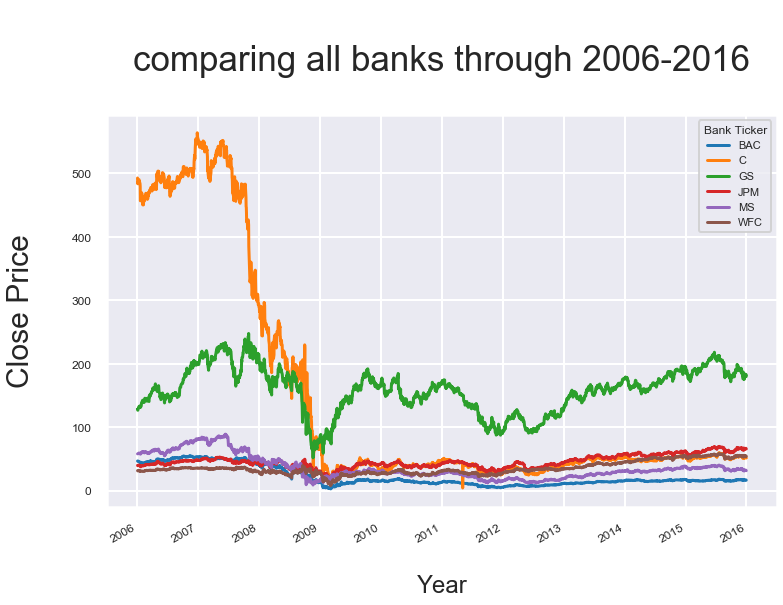

In [8]:
close.plot(figsize=(12,8),fontsize =12)
plt.title('\ncomparing all banks through 2006-2016\n',fontsize=35)
plt.ylabel('Close Price\n', fontsize=30)
plt.xlabel('\nYear',fontsize=24)

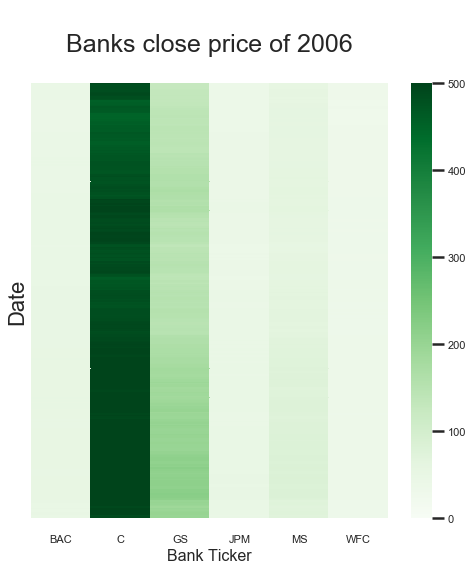

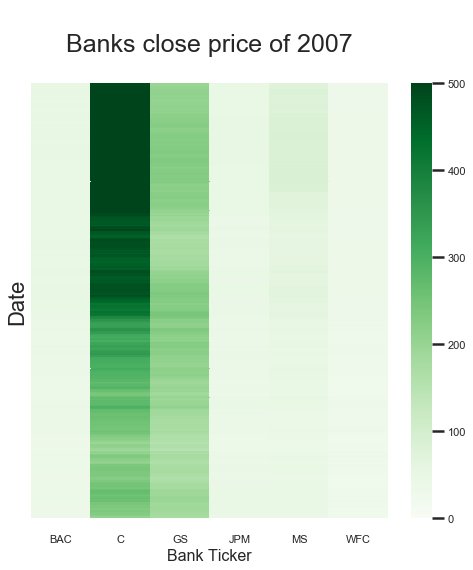

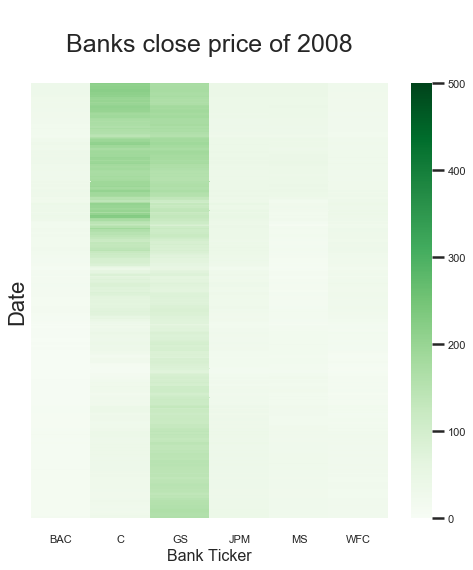

In [21]:
# heatmapS for every year of the 'close' price


for i in range(3):
    plt.figure(figsize=(8,8))
    
    plt.xlabel('Bank Ticker',fontsize=16)
    plt.ylabel('Date',fontsize=22)
    plt.title('\nBanks close price of {}\n'.format(2006+i),fontsize=25)
    
    sns.heatmap(vmin = 0,vmax = 500,data = close.iloc[300*i:300*(i+1)]
                    ,cmap = 'Greens',yticklabels=False ,cbar=True)

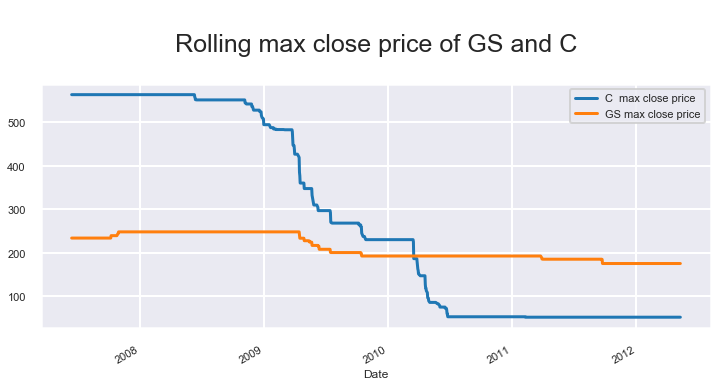

In [11]:
# rolling max values of GS and C


plt.figure(figsize=(12,5))
plt.title('\nRolling max close price of GS and C\n',fontsize=25)
close['C'].iloc[0:1600].rolling(window=365).max().plot(label =  'C  max close price')
close['GS'].iloc[0:1600].rolling(window=365).max().plot(label = 'GS max close price')
plt.legend()

In [12]:
#  numerical diffs between GolmanSacks and City Group

CGS = close[['C','GS']]

C_Higher = CGS[close['C']>close['GS']].count()[0]
print('Total days C  close was higher:',C_Higher)

GS_Higher = CGS[close['C']<close['GS']].count()[0]
print('Total days GC close was higher:',GS_Higher)

Total days C  close was higher: 725
Total days GC close was higher: 1792


In [13]:
totalDiffs = round(sum(CGS['GS']-CGS['C']),0)
print('Total close price difference in favor of GS: ',totalDiffs)

Total close price difference in favor of GS:  32996.0


In [14]:
# The differences between each close price

returns = close.pct_change()

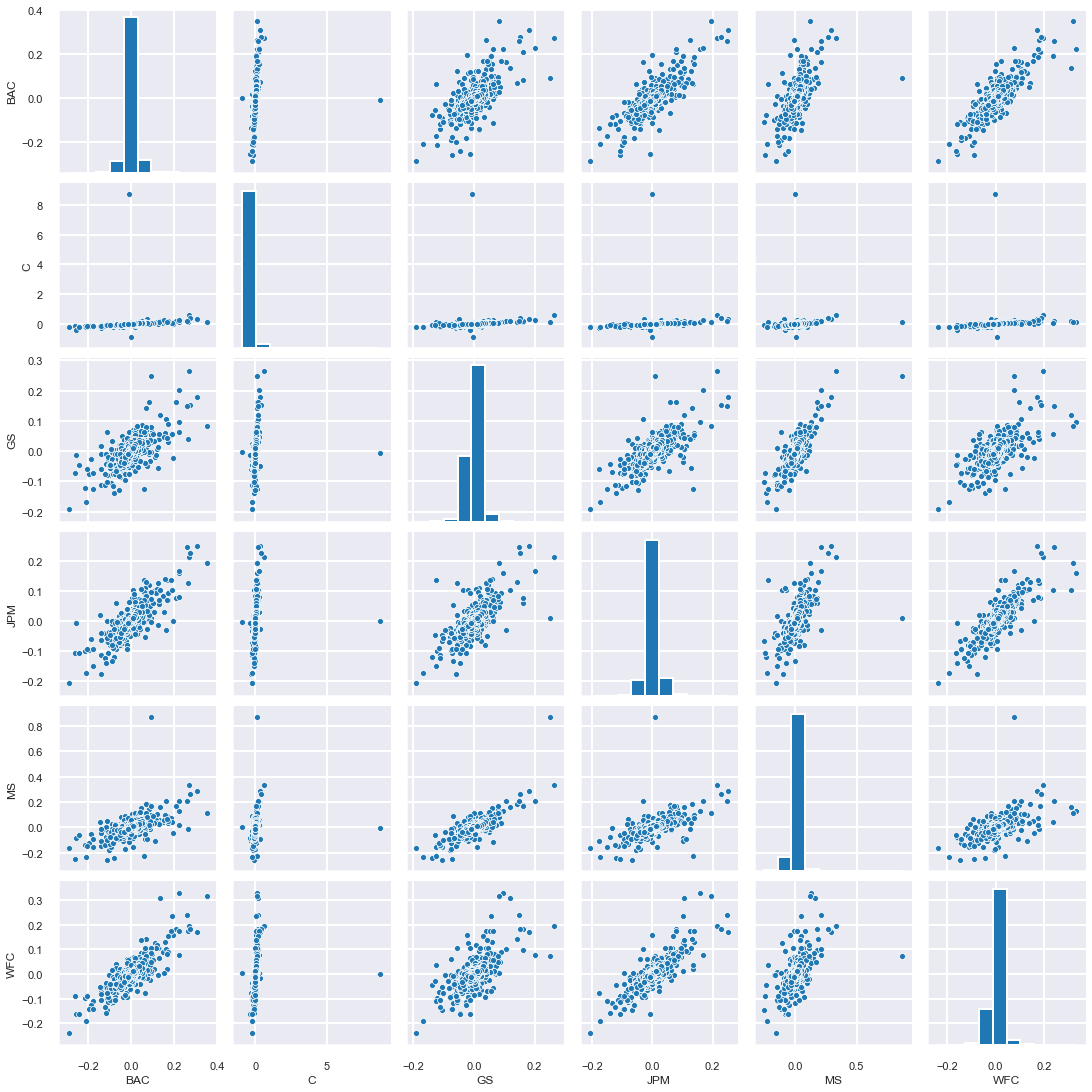

In [24]:
sns.pairplot(returns[1:],markers = '.')

In [16]:
# returns of 2015

returns2015 = returns.loc[returns.index.year==2015]

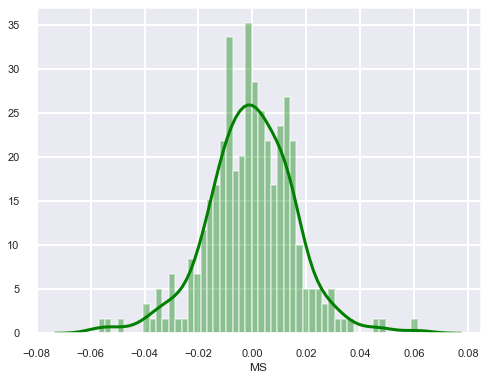

In [140]:
plt.figure(figsize=(8,6))
sns.distplot(returns2015['MS'],bins=50,color = 'green')


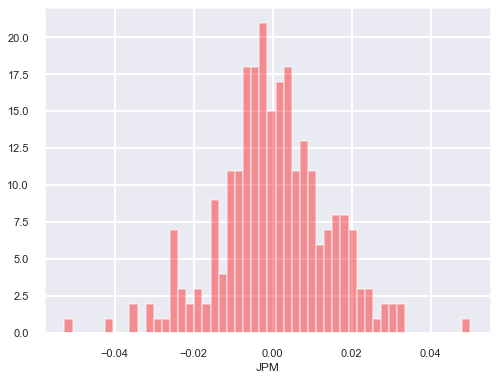

In [194]:
plt.figure(figsize=(8,6))
sns.distplot(returns2015['JPM'],bins=50,color = 'red',kde = False)

In [185]:
# coorelation between bank's close prices

close.corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971514,0.550950,0.103896,0.944219,0.008567
C,0.971514,1.000000,0.434171,0.003540,0.933605,-0.068441
GS,0.550950,0.434171,1.000000,0.685280,0.683834,0.499901
JPM,0.103896,0.003540,0.685280,1.000000,0.250441,0.940279
MS,0.944219,0.933605,0.683834,0.250441,1.000000,0.131864
WFC,0.008567,-0.068441,0.499901,0.940279,0.131864,1.000000


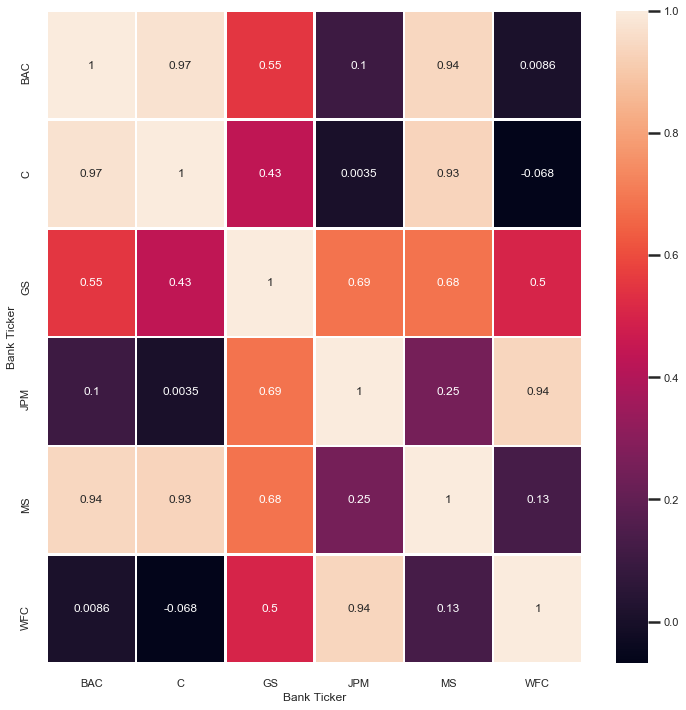

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(close.corr(),lw=1.5, linecolor='white',annot=True)

#  a notation abbout thr map 
#  it's seen the only bank that doesn't correlate with others , is the GS .
# This bank is the most benefitual at this time

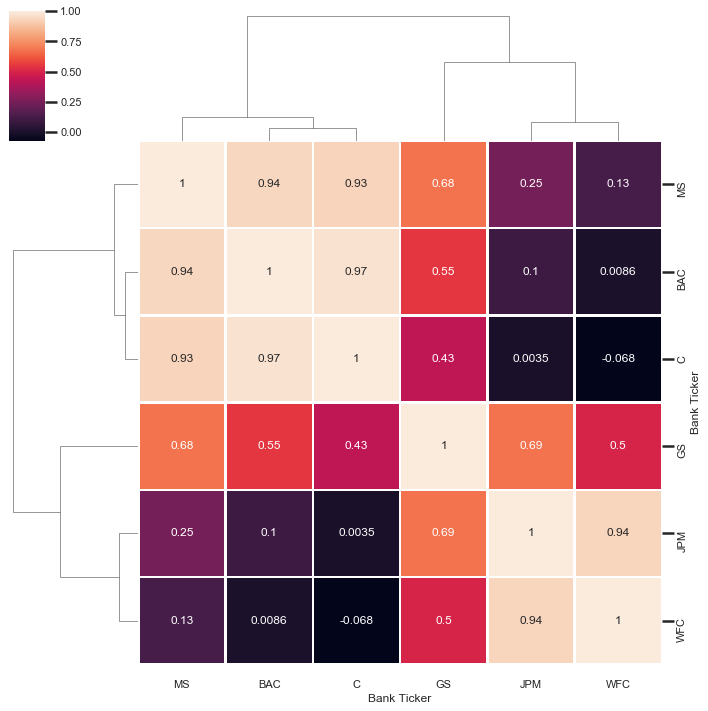

In [192]:
sns.clustermap(close.corr(),lw=1.5, linecolor= 'white',annot=True)